In [4]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image

In [3]:
source_dir = r"D:\DA\dataset\waste_dataset\taphuanluyen\recyclables\book"
if os.path.isdir(source_dir):
    images_file = [f for f in os.listdir(source_dir) if f.endswith(('jpg', 'jpeg', 'png'))]

In [4]:
len(images_file)

729

In [6]:
# source_dir_daudocthuocla = "D:\\DA\\dataset\\waste_dataset\\archive\\test\\cigarettebutt"
# files = os.listdir(source_dir_daudocthuocla)
# for filename in files:
#     old_path = os.path.join(source_dir_daudocthuocla, filename)
#     new_filename = 'added_' + filename
#     new_path = os.path.join(source_dir_daudocthuocla, new_filename)
#     os.rename(old_path, new_path)

In [9]:
source_dir_milk = r"D:\DA\dataset\waste_dataset\tapkiemthu\recyclables\milk_carton"
files = os.listdir(source_dir_milk)
for filename in files:
    old_path = os.path.join(source_dir_milk, filename)
    new_filename = 'added_' + filename
    new_path = os.path.join(source_dir_milk, new_filename)
    os.rename(old_path, new_path)

In [10]:
trainset_dir = r"D:\DA\dataset\waste_dataset\taphuanluyen"

image_extensions = {".jpg", ".jpeg", ".png"}

class_names = []
img_count = []
for root, dirs, files in os.walk(trainset_dir):
    if not dirs:
        class_name = os.path.basename(root)
        class_names.append(class_name)
        img_count.append(len(files))

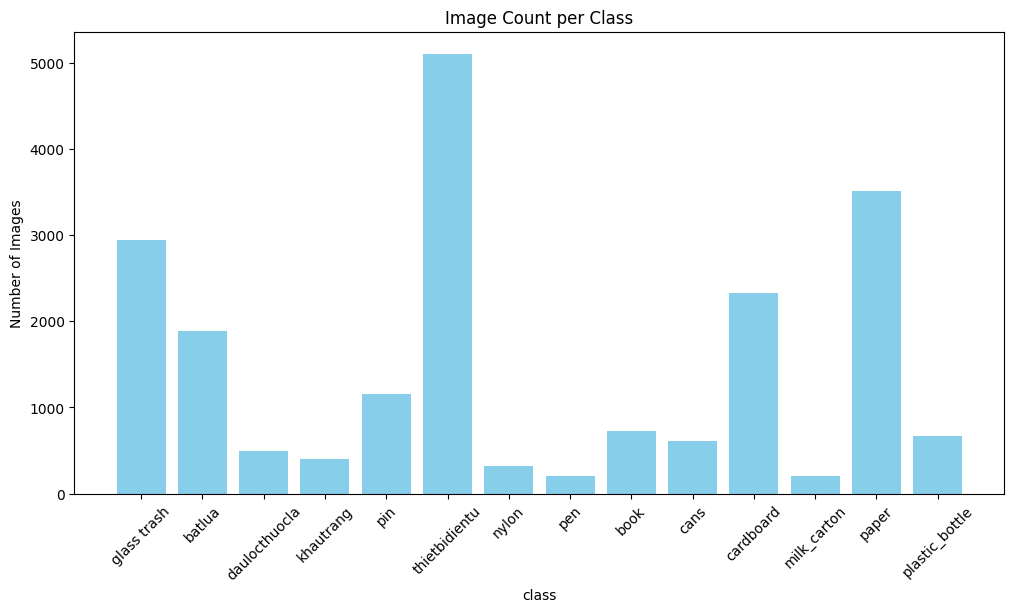

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(class_names, img_count, color='skyblue')
plt.xlabel("class")
plt.ylabel("Number of Images")
plt.title("Image Count per Class")
plt.xticks(rotation=45)
plt.show()

In [12]:
print(class_names,"\n",img_count)

['glass trash', 'batlua', 'daulocthuocla', 'khautrang', 'pin', 'thietbidientu', 'nylon', 'pen', 'book', 'cans', 'cardboard', 'milk_carton', 'paper', 'plastic_bottle'] 
 [2945, 1886, 494, 400, 1159, 5106, 323, 210, 729, 606, 2333, 207, 3513, 666]


In [16]:
raw_train_dir = r"D:\DA\dataset\waste_dataset\taphuanluyen"
balanced_train_dir = r"D:\DA\dataset\waste_dataset_balance\taphuanluyen"
balanced_test_dir = r"D:\DA\dataset\waste_dataset_balance\tapkiemthu"

image_extensions = {".jpg", ".jpeg", ".png"}

cap = 400

image_extensions = {".jpg", ".jpeg", ".png", ".gif", ".bmp"}

# Cap for images per class
cap = 500

# Create destination directories if they don't exist
os.makedirs(balanced_train_dir, exist_ok=True)
os.makedirs(balanced_test_dir, exist_ok=True)

# Recursively find all leaf directories that contain images
leaf_dirs = []
for root, dirs, files in os.walk(raw_train_dir):
    # If no subdirectories exist, consider it a leaf folder
    if not dirs:
        # Only add the folder if it contains at least one image file
        if any(os.path.splitext(f)[1].lower() in image_extensions for f in files):
            leaf_dirs.append(root)

print("Found the following class folders:")
for folder in leaf_dirs:
    print(folder)

# Process each leaf folder (each is a class)
for leaf in leaf_dirs:
    # Use the final folder name as the class name (e.g. "batlua" from "hazardous trash/batlua")
    class_name = os.path.basename(leaf)
    print(f"\nProcessing class: {class_name}")
    
    # List image files in this folder (filter by extension)
    images = [f for f in os.listdir(leaf)
              if os.path.splitext(f)[1].lower() in image_extensions]
    
    # Cap the number of images at 500 if necessary
    if len(images) > cap:
        images = random.sample(images, cap)
        print(f"  Capped to {cap} images (randomly sampled).")
    else:
        print(f"  Only {len(images)} images available; using all.")

    # Split images into 80% train and 20% test
    train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)
    print(f"  {len(train_imgs)} images for training and {len(test_imgs)} for testing.")
    
    # Create destination folders for this class in both train and test directories
    dest_train_class = os.path.join(balanced_train_dir, class_name)
    dest_test_class  = os.path.join(balanced_test_dir, class_name)
    os.makedirs(dest_train_class, exist_ok=True)
    os.makedirs(dest_test_class, exist_ok=True)
    
    # Copy training images
    for img in train_imgs:
        src_path = os.path.join(leaf, img)
        dst_path = os.path.join(dest_train_class, img)
        shutil.copy2(src_path, dst_path)
        # Optionally, print a message:
        # print(f"Copied TRAIN: {src_path} -> {dst_path}")
    
    # Copy testing images
    for img in test_imgs:
        src_path = os.path.join(leaf, img)
        dst_path = os.path.join(dest_test_class, img)
        shutil.copy2(src_path, dst_path)
        # Optionally, print a message:
        # print(f"Copied TEST: {src_path} -> {dst_path}")

print("\nBalanced dataset creation complete.")

Found the following class folders:
D:\DA\dataset\waste_dataset\taphuanluyen\glass trash
D:\DA\dataset\waste_dataset\taphuanluyen\hazardous trash\batlua
D:\DA\dataset\waste_dataset\taphuanluyen\hazardous trash\daulocthuocla
D:\DA\dataset\waste_dataset\taphuanluyen\hazardous trash\khautrang
D:\DA\dataset\waste_dataset\taphuanluyen\hazardous trash\pin
D:\DA\dataset\waste_dataset\taphuanluyen\hazardous trash\thietbidientu
D:\DA\dataset\waste_dataset\taphuanluyen\non-recycable trash\nylon
D:\DA\dataset\waste_dataset\taphuanluyen\non-recycable trash\pen
D:\DA\dataset\waste_dataset\taphuanluyen\recyclables\book
D:\DA\dataset\waste_dataset\taphuanluyen\recyclables\cans
D:\DA\dataset\waste_dataset\taphuanluyen\recyclables\cardboard
D:\DA\dataset\waste_dataset\taphuanluyen\recyclables\milk_carton
D:\DA\dataset\waste_dataset\taphuanluyen\recyclables\paper
D:\DA\dataset\waste_dataset\taphuanluyen\recyclables\plastic_bottle

Processing class: glass trash
  Capped to 500 images (randomly sampled).
 

In [26]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Paths for your balanced train data and output augmented dataset
balanced_train_dir = r"D:\DA\dataset\waste_dataset_balance\tapkiemthu"    # e.g., "D:\DA\dataset\balanced_train_set"
augmented_output_dir = r"D:\DA\dataset\aug_waste_dataset_balance\tapkiemthu"  # e.g., "D:\DA\dataset\augment_balance_dataset"

# Create the augmented dataset output folder if it doesn't exist
os.makedirs(augmented_output_dir, exist_ok=True)

# Define your augmentation parameters
datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Parameters: target size for images and number of augmentations per original image
target_size = (224, 224)  # adjust if needed
n_augmented = 5  # number of augmented images to generate per original

# Loop through each class folder in the balanced train set
for class_name in os.listdir(balanced_train_dir):
    class_dir = os.path.join(balanced_train_dir, class_name)
    if os.path.isdir(class_dir):
        out_class_dir = os.path.join(augmented_output_dir, class_name)
        os.makedirs(out_class_dir, exist_ok=True)
        
        # Process each file in the class folder
        for item in os.listdir(class_dir):
            img_path = os.path.join(class_dir, item)
            # Ensure that the item is a file before processing
            if not os.path.isfile(img_path):
                print(f"Skipping non-file item: {img_path}")
                continue
            try:
                img = load_img(img_path, target_size=target_size)
                # Convert image to RGB if necessary
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                x = img_to_array(img)
                x = np.expand_dims(x, axis=0)
                
                aug_iter = datagen.flow(x, batch_size=1,
                                        save_to_dir=out_class_dir,
                                        save_prefix='aug',
                                        save_format='jpg')
                for i in range(n_augmented):
                    next(aug_iter)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")

print("Augmented dataset creation complete.")

Augmented dataset creation complete.


batlua: 400 images
book: 400 images
cans: 400 images
cardboard: 400 images
daulocthuocla: 395 images
glass trash: 400 images
khautrang: 320 images
milk_carton: 165 images
nylon: 258 images
paper: 400 images
pen: 168 images
pin: 400 images
plastic_bottle: 400 images
thietbidientu: 400 images


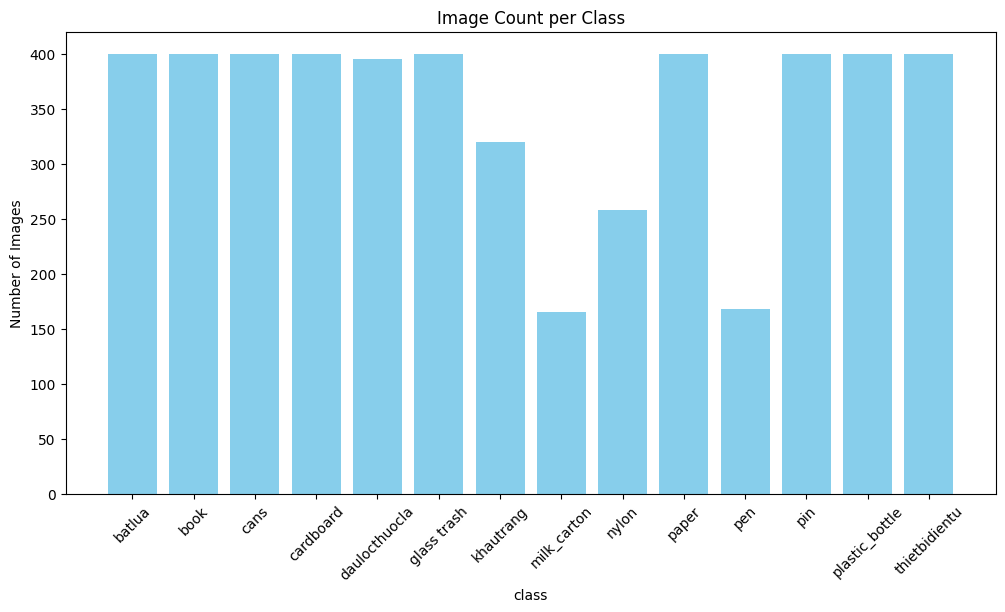

In [5]:
trainset_dir = r"D:\DA\dataset\waste_dataset_balance\taphuanluyen"

image_extensions = {".jpg", ".jpeg", ".png"}

class_names = []
img_counts = []
for class_name in os.listdir(trainset_dir):
    class_dir = os.path.join(trainset_dir, class_name)
    if os.path.isdir(class_dir):
        images = [f for f in os.listdir(class_dir)]
        class_names.append(class_name)
        img_counts.append(len(images))
        print(f"{class_name}: {len(images)} images")

plt.figure(figsize=(12, 6))
plt.bar(class_names, img_counts, color='skyblue')
plt.xlabel("class")
plt.ylabel("Number of Images")
plt.title("Image Count per Class")
plt.xticks(rotation=45)
plt.show()

batlua: 1823 images
book: 1814 images
cans: 1820 images
cardboard: 1809 images
daulocthuocla: 1806 images
glass trash: 1814 images
khautrang: 1487 images
milk_carton: 786 images
nylon: 1209 images
paper: 1831 images
pen: 815 images
pin: 1806 images
plastic_bottle: 1816 images
thietbidientu: 1806 images


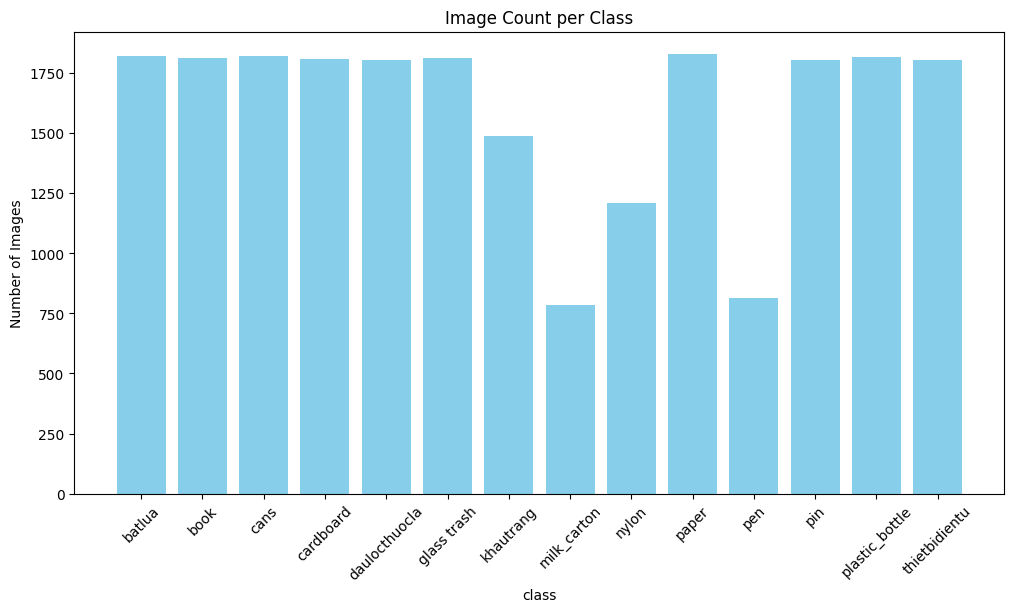

In [28]:
trainset_dir = r"D:\DA\dataset\aug_waste_dataset_balance\taphuanluyen"

image_extensions = {".jpg", ".jpeg", ".png"}

class_names = []
img_counts = []
for class_name in os.listdir(trainset_dir):
    class_dir = os.path.join(trainset_dir, class_name)
    if os.path.isdir(class_dir):
        images = [f for f in os.listdir(class_dir)]
        class_names.append(class_name)
        img_counts.append(len(images))
        print(f"{class_name}: {len(images)} images")

plt.figure(figsize=(12, 6))
plt.bar(class_names, img_counts, color='skyblue')
plt.xlabel("class")
plt.ylabel("Number of Images")
plt.title("Image Count per Class")
plt.xticks(rotation=45)
plt.show()

batlua: 484 images
book: 494 images
cans: 488 images
cardboard: 484 images
daulocthuocla: 486 images
glass trash: 488 images
khautrang: 393 images
milk_carton: 206 images
nylon: 321 images
paper: 489 images
pen: 209 images
pin: 484 images
plastic_bottle: 492 images
thietbidientu: 488 images


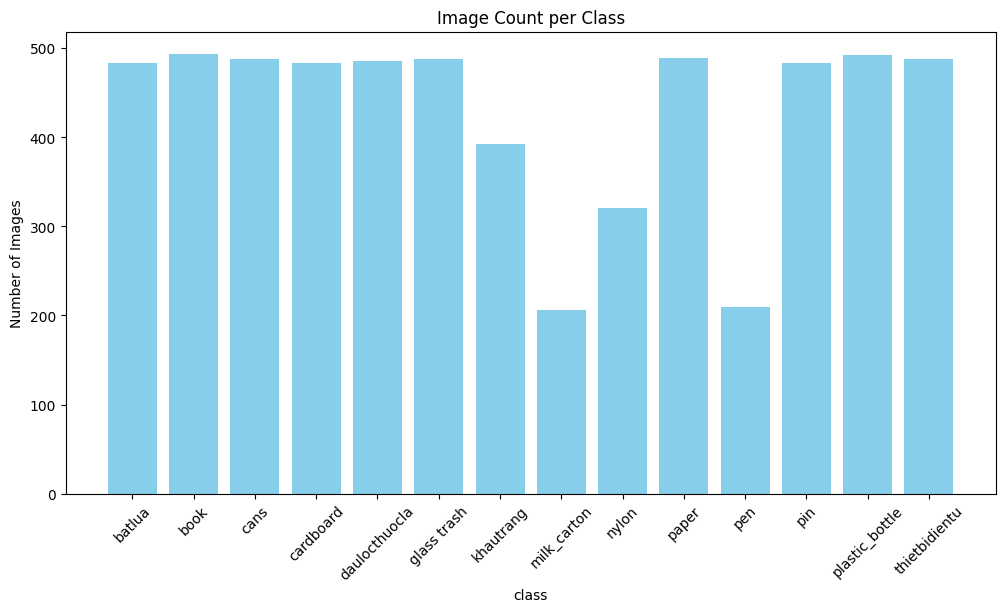

In [29]:
trainset_dir = r"D:\DA\dataset\aug_waste_dataset_balance\tapkiemthu"

image_extensions = {".jpg", ".jpeg", ".png"}

class_names = []
img_counts = []
for class_name in os.listdir(trainset_dir):
    class_dir = os.path.join(trainset_dir, class_name)
    if os.path.isdir(class_dir):
        images = [f for f in os.listdir(class_dir)]
        class_names.append(class_name)
        img_counts.append(len(images))
        print(f"{class_name}: {len(images)} images")

plt.figure(figsize=(12, 6))
plt.bar(class_names, img_counts, color='skyblue')
plt.xlabel("class")
plt.ylabel("Number of Images")
plt.title("Image Count per Class")
plt.xticks(rotation=45)
plt.show()